In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [35]:
pos = [0,1,2,3,4,5,6,7]
k1 = 20
k2 = 10
dy = [0,0.5,2.5,5.5,0.0,1.0,3.0,6.0]
ky = [[0,k1,k1,k1,0,0,0,0],[k1,0,k1,k1,0,0,0,0],[k1,k1,0,k1,0,0,0,0],[k1,k1,k1,0,0,0,0,0],
      [0,0,0,0,0,k2,k2,k2],[0,0,0,0,k2,0,k2,k2],[0,0,0,0,k2,k2,0,k2],[0,0,0,0,k2,k2,k2,0]]

In [36]:
def soly(u,k): 
    final = []
    for i in pos:
        add = []
        value = 0
        for j in pos:
            q = abs(j-i)
            if j-i == 1 or i-j == 1:  
                value = 0.5*(k[i][j])*abs(u[j]-u[i])**2.0
                add.append(value)
            elif j-i == 0 : 
                add.append(0)
            elif j - i > 1.0: 
                if k[i][j] == 0: 
                    add.append(0)
                elif k[i][j] != 0: 
                    t = 0
                    x = j-1
                    y = j
                    while y > 0:
                        if k[i][y] == 0:
                            y = y - 1
                        pe = ((k[i][y])*(u[y] - u[x])**2.0)/2
                        t = t + pe
                        y = y - 1
                        x = x - 1
                    add.append(t)
                    t = 0
            elif j - i < -1:
                if k[i][j] == 0: 
                     add.append(0)
                elif k[i][j] != 0:
                    t = 0
                    y = j
                    x = i 
                    jin = j + 1
                    while y < i:
                        pe = ((k[i][j])*(u[j] - u[jin])**2.0)/2
                        t = t + pe
                        j += 1
                        jin += 1
                        y += 1
                    add.append(t)
                    t = 0
        final.append(add)  
    return final 

In [37]:
print soly(dy,ky)

[[0, 2.5, 42.5, 132.5, 0, 0, 0, 0], [2.5, 0, 40.0, 130.0, 0, 0, 0, 0], [42.5, 40.0, 0, 90.0, 0, 0, 0, 0], [132.5, 130.0, 90.0, 0, 0.0, 0, 0, 0], [0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0], [0, 0, 0, 0, 5.0, 0, 20.0, 65.0], [0, 0, 0, 0, 25.0, 20.0, 0, 45.0], [0, 0, 0, 0, 70.0, 65.0, 45.0, 0]]


In [53]:
dx = [0,0.5,1.5,2.5,0,1,2,3]
kx = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,k1,0,0],[0,0,0,0,0,0,k1,0],[0,0,0,0,0,0,0,k1],
      [0,0,0,0,0,0,0,0],[0,k1,0,0,0,0,0,0],[0,0,k1,0,0,0,0,0],[0,0,0,k1,0,0,0,0]]

In [56]:
def solx(u,k):
    final = []
    for i in pos:
        add = []
        for j in pos:
            if k[i][j] == 0:
                add.append(0)
            elif k[i][j] != 0:
                add.append(((k[i][j])*(abs(u[j]-u[i])**2.0))/2.)       
        final.append(add)
    return final

In [57]:
print solx(dx,kx)

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2.5, 0, 0], [0, 0, 0, 0, 0, 0, 2.5, 0], [0, 0, 0, 0, 0, 0, 0, 2.5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 2.5, 0, 0, 0, 0, 0, 0], [0, 0, 2.5, 0, 0, 0, 0, 0], [0, 0, 0, 2.5, 0, 0, 0, 0]]


In [62]:
def combine(ux,uy,kx,ky):
    ansx = solx(ux,kx)
    ansy = soly(uy,ky)
    value = np.array(np.zeros(len(ux)))
    for i in ansx:
        add = np.array(i)
        value += add
    for i in ansy:
        add = np.array(i)
        value += add
    return value

In [64]:
combine(dx,dy,kx,ky)

array([ 177.5,  175. ,  175. ,  355. ,  100. ,   92.5,   92.5,  182.5])

In [70]:
X, Y = np.meshgrid(dx, dy)

In [76]:
print solx(dx,kx)
print soly(dy,ky)

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2.5, 0, 0], [0, 0, 0, 0, 0, 0, 2.5, 0], [0, 0, 0, 0, 0, 0, 0, 2.5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 2.5, 0, 0, 0, 0, 0, 0], [0, 0, 2.5, 0, 0, 0, 0, 0], [0, 0, 0, 2.5, 0, 0, 0, 0]]
[[0, 2.5, 42.5, 132.5, 0, 0, 0, 0], [2.5, 0, 40.0, 130.0, 0, 0, 0, 0], [42.5, 40.0, 0, 90.0, 0, 0, 0, 0], [132.5, 130.0, 90.0, 0, 0.0, 0, 0, 0], [0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0], [0, 0, 0, 0, 5.0, 0, 20.0, 65.0], [0, 0, 0, 0, 25.0, 20.0, 0, 45.0], [0, 0, 0, 0, 70.0, 65.0, 45.0, 0]]


In [79]:
a = np.array([0, 2.5, 42.5, 132.5, 0, 0, 0, 0])
b = np.array([2.5, 0, 40.0, 130.0, 0, 2.5, 0, 0])
c = np.array([42.5, 40.0, 0, 90.0, 0, 0, 2.5, 0])
d = np.array([132.5, 130.0, 90.0, 0, 0.0, 0, 0, 2.5])
e = np.array([0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0])
f = np.array([0, 2.5, 0, 0, 5.0, 0, 20.0, 65.0])
g = np.array([0, 0, 0, 0, 25.0, 20.0, 0, 45.0])
h = np.array([0, 0, 0, 2.5, 70.0, 65.0, 45.0, 0])
a+b+c+d+e+f+g+h

array([ 177.5,  175. ,  172.5,  355. ,  100. ,   92.5,   92.5,  182.5])

In [83]:
lst = []
lst.append(a)
lst.append(b)
lst.append(c)
lst.append(d)
lst.append(e)
lst.append(f)
lst.append(g)
lst.append(h)
lst

[[0, 2.5, 42.5, 132.5, 0, 0, 0, 0],
 [2.5, 0, 40.0, 130.0, 0, 2.5, 0, 0],
 [42.5, 40.0, 0, 90.0, 0, 0, 2.5, 0],
 [132.5, 130.0, 90.0, 0, 0.0, 0, 0, 2.5],
 [0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0],
 [0, 2.5, 0, 0, 5.0, 0, 20.0, 65.0],
 [0, 0, 0, 0, 25.0, 20.0, 0, 45.0],
 [0, 0, 0, 2.5, 70.0, 65.0, 45.0, 0]]

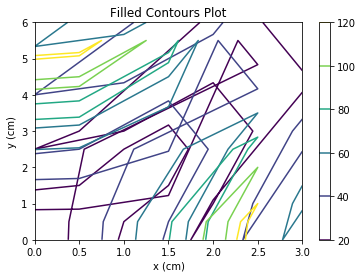

In [87]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = np.meshgrid(dx, dy)
Z = lst
cp = plt.contour(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()